# Logistic Regression exercise

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
plt.rcParams['figure.figsize'] = (15., 12.) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
%load_ext autoreload
%autoreload 2

In [2]:
# Read the data for you
data = pd.read_csv('./DSVC/datasets/MNIST.csv',header=0).values # change the path by yourself
imgs = data[0::,1::]
labels = data[::,0]

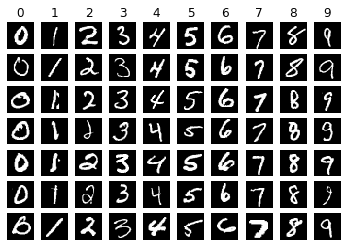

In [3]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = range(10)
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(labels == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(imgs[idx].reshape(28,28).astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

# Binary classification
We use the Logistic Regression to classification handwritten digits wheather it's zero or not. If the handwritten digits is '0' , then the label is 0, otherwise, the label is 1.

In [4]:
# transform the labels to binary
for i in range(len(labels)):
    if labels[i] != 0:
        labels[i] = 1
        
# 2/3 training set
# 1/3 test set
split_index = int(len(labels) * 2 / 3)
X_train = imgs[:split_index]
y_train = labels[:split_index]
X_test = imgs[split_index:]
y_test = labels[split_index:]
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

In [9]:
X_train_feats = X_train
X_test_feats = X_test

#X_train_feats = (X_train - np.mean(X_train)) / np.std(X_train) # choose and extract features
#X_test_feats = (X_test - np.mean(X_test)) / np.std(X_test) # choose and extract features
print(X_train_feats.shape)
print(X_test_feats.shape)

(28000, 785)
(14000, 785)


In [12]:
#print(X_train_feats[0])

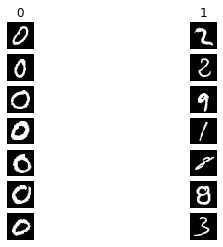

In [13]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = range(2)
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(labels == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(imgs[idx].reshape(28,28).astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [24]:
from DSVC.classifiers import LogisticRegression

# Start training. 
# You should open DSVC/classifiers/logistic_regression.py and implement the function.
# Then run this cell.

classifier = LogisticRegression()
loss_history = classifier.train(
    X_train_feats, 
    y_train,
    learning_rate = 1e-5,
    num_iters = 10,
    batch_size = 64,
)

0
0
iteration 0 / 10: loss 1.845587
0
0
iteration 1 / 10: loss 1.617319
0
0
iteration 2 / 10: loss 0.389300
0
0
iteration 3 / 10: loss 0.712567
0
0
iteration 4 / 10: loss 0.598653
0
0
iteration 5 / 10: loss 0.303115
0
0
iteration 6 / 10: loss 0.087227
0
0
iteration 7 / 10: loss 0.125130
0
0
iteration 8 / 10: loss 0.119788
0
0
iteration 9 / 10: loss 0.126659


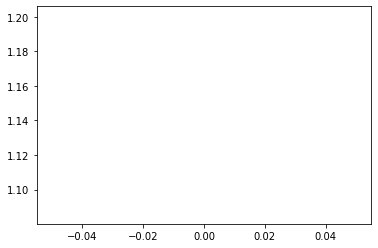

In [15]:
plt.plot(loss_history)

In [39]:
y_test_pred = classifier.predict(X_test_feats)
print(y_test.shape)
print(X_test_feats.shape)
print("The accuracy socre is ", np.mean(y_test == y_test_pred))

(14000,)
(14000, 786)
The accuracy socre is  0.9766428571428571


you should get the accuracy higher than 96%.

----

### F1-Measure
Notice that, if our model always output '1', totally ignoring the input X, we can get a accuracy 90%.So, in this assignment, accuracy is not efficient enough. 

We will use F1-Measure to evaluate our model.

You may need this:
[F1-Measure](https://baike.baidu.com/item/f-measure/913107?fr=aladdin)

In [40]:
# Calculate the precision(准确率), recall(召回率) and F1
# important： We should consider label '0' as 'positive' here. 
# That means 'True positive' ==> '(y_test == 0) and (y_test_pred == 0)'

#######Your code here########
TP = 0
FP = 0
FN = 0
TN = 0
for i in range(y_test.shape[0]):
    if y_test[i] == 0 and y_test_pred[i] == 0:
        TP += 1
    
    if y_test[i] == 1 and y_test_pred[i] == 0:
        FP += 1
        
    if y_test[i] == 0 and y_test_pred[i] == 1:
        FN += 1
        
    if y_test[i] == 1 and y_test_pred[i] == 1:
        TN += 1
        
precision = TP / (TP + FP)
recall = TP / (TP + FN)

print(precision)
print(recall)
print('F1:', precision*recall*2/(precision+recall))

0.9696707105719238
0.7930545712260808
F1: 0.872514619883041


you should get the F1 higher than 85%.

# Multiclass classification

Now, we use the Logistic Regression to classification handwritten digits. There are 10 class, from '0' to '9'.


Hint: The method "one vs all" may helpful. [Here is the introduction to "one vs all"](https://msdn.microsoft.com/library/en-us/Dn905887.aspx). 

In [2]:
# Read the data for you
data = pd.read_csv('./DSVC/datasets/MNIST.csv',header=0).values # change the path by yourself
imgs = data[0::,1::]
labels = data[::,0]
        
# 2/3 training set
# 1/3 test set
split_index = int(len(labels) * 2 / 3)
X_train = imgs[:split_index]
y_train = labels[:split_index]
X_test = imgs[split_index:]
y_test = labels[split_index:]

X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

print(X_train.shape)
print(X_test.shape)

(28000, 785)
(14000, 785)


In [3]:
X_train_feats = (X_train - np.mean(X_train)) / np.std(X_train) # choose and extract features
X_test_feats = (X_test - np.mean(X_test)) / np.std(X_test) # choose and extract features

In [5]:
# Start training. 
# You should update your code in DSVC/classifiers/logistic_regression.py .
# Then run this cell.
from DSVC.classifiers import LogisticRegression
classifier = LogisticRegression()
loss_history = classifier.one_vs_all(
    X_train_feats, 
    y_train,
    learning_rate = 1e-2,
    num_iters = 500,
    batch_size = 64,
)

iteration 0 / 500: loss 0.697098
iteration 100 / 500: loss 0.062360
iteration 200 / 500: loss 0.026486
iteration 300 / 500: loss 0.129218
iteration 400 / 500: loss 0.054023
-----------------------
iteration 0 / 500: loss 1.462383
iteration 100 / 500: loss 0.086538
iteration 200 / 500: loss 0.025380
iteration 300 / 500: loss 0.039172
iteration 400 / 500: loss 0.029384
-----------------------
iteration 0 / 500: loss 1.298565
iteration 100 / 500: loss 0.096690
iteration 200 / 500: loss 0.088040
iteration 300 / 500: loss 0.083414
iteration 400 / 500: loss 0.070023
-----------------------
iteration 0 / 500: loss 0.676250
iteration 100 / 500: loss 0.088354
iteration 200 / 500: loss 0.081138
iteration 300 / 500: loss 0.142939
iteration 400 / 500: loss 0.285296
-----------------------
iteration 0 / 500: loss 1.126595
iteration 100 / 500: loss 0.158677
iteration 200 / 500: loss 0.161993
iteration 300 / 500: loss 0.097565
iteration 400 / 500: loss 0.074403
-----------------------
iteration 0 / 5

In [6]:
# you may change your code in function `predict`
y_test_pred = classifier.one_vs_all_predict(X_test_feats)
print("The accruacy socre is ", np.mean(y_test == y_test_pred))

The accruacy socre is  0.8792142857142857
